In [86]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [87]:
# Import dataset
df = pd.read_csv(r"C:\Users\Chinthaka\Desktop\Data science skill building 2023\ML\Logistic regression\datasets\heart.csv")

In [88]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [89]:
df.shape

(303, 14)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [91]:
# all features are in numeric format

In [92]:
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [93]:
df.ca.value_counts()

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

In [94]:
df.thal.value_counts()

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

In [95]:
# convert ca column into int
# non maching characters will be converted to null
df['ca'] = pd.to_numeric(df['ca'],errors='coerce')

In [96]:
# convert thal column into int
# non maching characters will be converted to null
df['thal'] = pd.to_numeric(df['thal'],errors='coerce')

<AxesSubplot:>

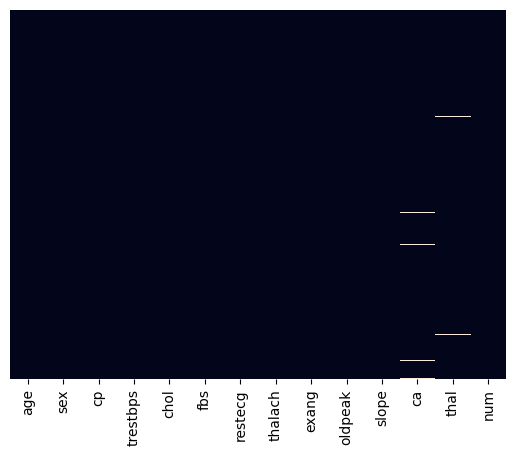

In [97]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

<AxesSubplot:>

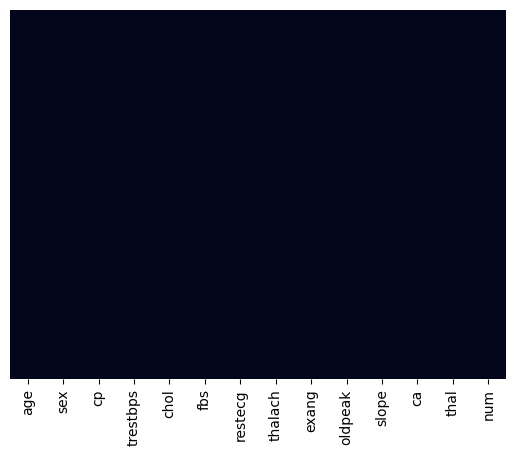

In [98]:
df.dropna(inplace=True,axis=0)
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [99]:
# Split into X and y
X = df.drop("num", axis=1)
y = df['num']

In [100]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [101]:
# model building
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# train model
model.fit(X_train,y_train)
# predict with test data
y_predicted = model.predict(X_test)
# Classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        36
           1       0.43      0.33      0.38         9
           2       0.25      0.20      0.22         5
           3       0.20      0.14      0.17         7
           4       0.00      0.00      0.00         3

    accuracy                           0.67        60
   macro avg       0.33      0.33      0.33        60
weighted avg       0.59      0.67      0.62        60



c:\Users\Chinthaka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Chinthaka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Chinthaka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classific